In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
# Define the directories for train and test data
train_dir = 'E:/newdata/train'
test_dir = 'E:/newdata/test'

# Image size
image_size = (224, 224)

# Batch size
batch_size = 32

# Data augmentation for training set (optional but recommended)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    horizontal_flip=True  # Random horizontal flip
)

# Data augmentation for test set (optional but recommended)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train and test data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # Set to 'categorical' if you have more than 2 classes
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # Set to 'categorical' if you have more than 2 classes
)

# Optionally, you can access class labels and their corresponding indices like this:
class_labels = list(train_data.class_indices.keys())
class_indices = train_data.class_indices

# Print the class labels and their indices
print("Class Labels:", class_labels)
print("Class Indices:", class_indices)


Found 1586 images belonging to 2 classes.
Found 588 images belonging to 2 classes.
Class Labels: ['damaged', 'good']
Class Indices: {'damaged': 0, 'good': 1}


Epoch 1/10
50/50 [==============================] - 424s 8s/step - loss: 0.9707 - accuracy: 0.5719
Epoch 2/10
50/50 [==============================] - 387s 8s/step - loss: 0.6009 - accuracy: 0.7125
Epoch 3/10
50/50 [==============================] - 388s 8s/step - loss: 0.5478 - accuracy: 0.7446
Epoch 4/10
50/50 [==============================] - 391s 8s/step - loss: 0.5098 - accuracy: 0.7547
Epoch 5/10
50/50 [==============================] - 389s 8s/step - loss: 0.4439 - accuracy: 0.7957
Epoch 6/10
50/50 [==============================] - 388s 8s/step - loss: 0.4446 - accuracy: 0.7957
Epoch 7/10
50/50 [==============================] - 391s 8s/step - loss: 0.4325 - accuracy: 0.7989
Epoch 8/10
50/50 [==============================] - 399s 8s/step - loss: 0.4453 - accuracy: 0.7850
Epoch 9/10
50/50 [==============================] - 409s 8s/step - loss: 0.4185 - accuracy: 0.8058
Epoch 10/10
19/19 [==============================] - 150s 8s/step - loss: 0.5615 - accuracy: 0.7449
Test Loss

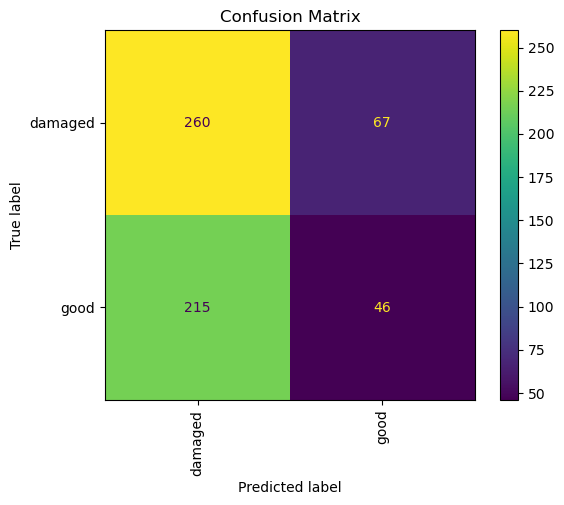

In [8]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Define the Model Architecture
input_shape = (224, 224, 3)  # Assuming RGB images with size 224x224

# Using Vision Transformer from TensorFlow Hub
vit_model_url = "https://tfhub.dev/google/bit/m-r50x1/1"
vit_model = tf.keras.Sequential([
    hub.KerasLayer(vit_model_url, input_shape=input_shape),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use sigmoid activation for binary classification
])

# Step 2: Compile the Model
vit_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 3: Train the Model
epochs = 10
vit_model.fit(train_data, epochs=epochs)

# Step 4: Evaluate the Model
test_loss, test_accuracy = vit_model.evaluate(test_data)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate predictions on the test dataset
y_pred_probs = vit_model.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Get true labels for the test dataset
y_true = test_data.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix as a heatmap
class_labels = list(train_data.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='viridis', values_format='d', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()
